<a href="https://colab.research.google.com/github/leobioinf0/233_Introduccion_a_la_ciencia_de_datos/blob/main/2_7_EJEMPLO_DE_UN_MODELO_DE_CLASIFICACION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.7 EJEMPLO DE UN MODELO DE CLASIFICACIÓN
Como vemos, ya tenemos el proyecto creado. Podemos descargarnos la base de datos con la 
que trabajaremos a través del enlace que encontramos debajo del video. Las primeras líneas 
de código son:

In [ ]:
import pandas as pd 
df = pd.read_csv ("./reviews_sentiment.csv",sep=';') 
df.head()

,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,23,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,negative,negative,1,-0.586187
2,Es muy buena lo recomiendo,Andres e puto amoooo,4,NaN,negative,1,-0.602240
3,Version antigua,Me gustana mas la version anterior esta es mas...,17,NaN,negative,1,-0.616271
4,Esta bien,Sin ser la biblia.... Esta bien,6,negative,negative,1,-0.651784


A  continuación,  podemos  ver  un  primer  resumen  estadístico.  ¿Recuerdas  cuál  era  la  función 
que podemos usar? Sí, es esta:

In [ ]:
df.describe() 

,wordcount,Star Rating,sentimentValue
count,257.000000,257.000000,257.000000
mean,11.501946,3.420233,0.383849
std,13.159812,1.409531,0.897987
min,1.000000,1.000000,-2.276469
25%,3.000000,3.000000,-0.108144
50%,7.000000,3.000000,0.264091
75%,16.000000,5.000000,0.808384
max,103.000000,5.000000,3.264579


Aquí vemos, pues, que la categoría mínima de los comentarios es 1 y la máxima es 5. Y que el 
número de palabras de un comentario es 1 y el máximo es 103. 

Acerquémonos a estos datos de una manera más visual. Escribamos este código: 

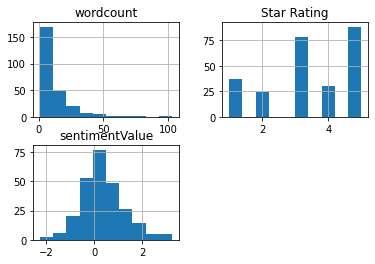

In [ ]:
import matplotlib.pyplot as plt 
df.hist() 
plt.show() 

Pasemos, ahora, a preparar el modelo. Primero, importemos estos dos módulos: 

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler 

Una  vez  hecho  este  paso,  preparamos  los  datos  de  tal  manera  que  tengamos  Star  Rating 
como variable resultante y wordcount y sentimentvalue como variables dependientes. 

In [ ]:
X = df[['wordcount','sentimentValue']].values 
y = df['Star Rating'].values  
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 
scaler = MinMaxScaler() 
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

Antes de aplicar el modelo, necesitamos importarlo desde el módulo donde está presente: 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 

Y ahora sí que lo tenemos preparado. Escribimos el código: 

In [ ]:
n_neighbors = 7  
knnModel = KNeighborsClassifier(n_neighbors) 
knnModel.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

Para  ver  si  el  modelo  es  bueno  o  no,  tendremos  que  calcular  Accuracy.  Lo  hacemos  de  la siguiente manera:

In [ ]:
print('Accuracy del modelo K-NN por el train set es: {:.2f}' 
     .format(knnModel.score(X_train, y_train))) 

Accuracy del modelo K-NN por el train set es: 0.90


El resultado que obtenemos es: 
Accuracy del modelo K-NN por el train set es: 0.90 
 
Lo que nos está indicando es que la precisión por el paquete de entrenamiento o train set es 
del 90 %. 

Fíjate que estamos usando un modelo de clasificación porque queremos predecir una categoría (1, 2, 3, 4 o 5) y no un número de valor cuantitativo, como en el ejercicio anterior. 

Para trabajar sobre la precisión del modelo, necesitamos importar las funciones siguientes: 

In [ ]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 

Y, después, ponerlas a trabajar sobre nuestro modelo: 

In [ ]:
pred = knnModel.predict(X_test) 
print(confusion_matrix(y_test, pred)) 
print(classification_report(y_test, pred)) 

[[ 9  0  1  0  0]
 [ 0  1  0  0  0]
 [ 0  1 17  0  1]
 [ 0  0  2  8  0]
 [ 0  0  4  0 21]]
              precision    recall  f1-score   support

           1       1.00      0.90      0.95        10
           2       0.50      1.00      0.67         1
           3       0.71      0.89      0.79        19
           4       1.00      0.80      0.89        10
           5       0.95      0.84      0.89        25

    accuracy                           0.86        65
   macro avg       0.83      0.89      0.84        65
weighted avg       0.89      0.86      0.87        65



Como  vemos,  el  resultado  “f1-score”  es  del  87  %  y,  por  lo  tanto,  podemos  considerar  que  la 
precisión es bastante buena.

Ahora,  nos  queda  ver  qué  categoría  asigna  nuestro  modelo,  considerando  un  número  de palabras (wordcount) y el valor de sentimiento (sentimentvalue) determinados. Introducimos 
este código:

In [ ]:
clf = KNeighborsClassifier(n_neighbors, weights='distance') 
clf.fit(X, y) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='distance')

Introducimos el wordcount y el sentimentvalue en la función predict():

In [ ]:
print(clf.predict([[5, 1.0]]))

[5]


Y el modelo nos dice que, en este caso, la categoría más probable seria 5.

Podemos  usar  la  función  predict_proba(),  para  ver  qué  probabilidad  tendría  cada  categoría 
para  un  determinado  comentario,  sabiendo  el  número  de  palabras  y  el  valor  de  sentimiento.

Lo haremos así:

In [ ]:
print(clf.predict_proba([[20, 0.0]]))

[[0.00381998 0.02520212 0.97097789 0.         0.        ]]


 El resultado que obtenemos es: 
 
[[0.00381998 0.02520212 0.97097789 0. 0. ]] 

Esto  quiere  decir  que  la  probabilidad  de  cada  categoría  para  un  comentario  de  20  palabras 
con un valor de sentimiento de 0.0 es la siguiente: 

- Categoría 1 – 0,3% 
- Categoría 2 – 2,52 % 
- Categoría 3 – 97,09 % 
- Categoría 4 – 0 % 
- Categoría 5 – 0 % 
 
Ya hemos visto un modelo de clasificación para predecir qué categoría tendría un comentario, 
teniendo en cuenta su número de palabras y el sentimiento de valor. 